In [1]:
import pandas as pd
from pycaret.classification import *
from tqdm import tqdm

# 데이콘 점수

In [2]:
# 제출 점수(제출 날짜) : 0.6467486819(2021-12-20 12:30:58)

# 설정

In [3]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [4]:
# 차이가 비교적 많이 나는 특성(25개)

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

In [5]:
# pycaret, nb
# tune : ❌(자체 점수 떨어짐.)
# combine
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

# 데이터 불러오기

In [6]:
# ../data/train.csv
# ../data/test.csv
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

# 데이터 확인

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   id                      501951 non-null  int64 
 1   d_l_match_yn            501951 non-null  bool  
 2   d_m_match_yn            501951 non-null  bool  
 3   d_s_match_yn            501951 non-null  bool  
 4   h_l_match_yn            501951 non-null  bool  
 5   h_m_match_yn            501951 non-null  bool  
 6   h_s_match_yn            501951 non-null  bool  
 7   person_attribute_a      501951 non-null  int64 
 8   person_attribute_a_1    501951 non-null  int64 
 9   person_attribute_b      501951 non-null  int64 
 10  person_prefer_c         501951 non-null  int64 
 11  person_prefer_d_1       501951 non-null  int64 
 12  person_prefer_d_2       501951 non-null  int64 
 13  person_prefer_d_3       501951 non-null  int64 
 14  person_prefer_e         501951 non-n

In [8]:
train.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt,target
0,0,True,True,True,False,False,False,1,4,3,5,275,370,369,8,1,1,4,95,59,3,3,10,2,1,2,1608,275,1,4,139,618822,354805,2020-01-17 12:09:36,1
1,1,False,False,False,True,True,False,1,3,4,1,114,181,175,4,1,1,131,101,96,1,3,5,1,1,2,1608,275,1,4,133,571659,346213,2020-06-18 17:48:52,0
2,2,False,False,False,True,False,False,2,0,3,5,464,175,452,3,1,1,54,263,56,3,1,10,2,1,1,1600,94,1,4,53,399816,206408,2020-07-08 20:00:10,0
3,3,False,False,False,True,False,False,2,0,2,5,703,705,704,3,1,1,72,227,2,1,3,5,1,1,2,1608,275,5,3,74,827967,572323,2020-01-13 18:09:34,0
4,4,True,True,True,False,False,False,1,3,4,5,275,370,369,4,1,1,214,210,209,1,1,10,2,1,2,1608,275,1,4,74,831614,573899,2020-03-09 20:39:22,0


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46404 entries, 0 to 46403
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   id                      46404 non-null  int64 
 1   d_l_match_yn            46404 non-null  bool  
 2   d_m_match_yn            46404 non-null  bool  
 3   d_s_match_yn            46404 non-null  bool  
 4   h_l_match_yn            46404 non-null  bool  
 5   h_m_match_yn            46404 non-null  bool  
 6   h_s_match_yn            46404 non-null  bool  
 7   person_attribute_a      46404 non-null  int64 
 8   person_attribute_a_1    46404 non-null  int64 
 9   person_attribute_b      46404 non-null  int64 
 10  person_prefer_c         46404 non-null  int64 
 11  person_prefer_d_1       46404 non-null  int64 
 12  person_prefer_d_2       46404 non-null  int64 
 13  person_prefer_d_3       46404 non-null  int64 
 14  person_prefer_e         46404 non-null  int64 
 15  pe

In [10]:
test.head()

,id,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,h_m_match_yn,h_s_match_yn,person_attribute_a,person_attribute_a_1,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_f,person_prefer_g,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j_1,contents_attribute_j,contents_attribute_c,contents_attribute_k,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,person_rn,contents_rn,contents_open_dt
0,0,True,False,False,True,True,True,1,1,2,1,857,851,1227,4,1,1,263,56,49,1,3,10,2,1,2,1147,839,1,5,263,393790,236865,2020-12-01 02:24:18
1,1,False,False,False,True,False,False,2,0,2,2,683,1086,662,2,1,1,258,263,49,1,3,5,1,1,2,1611,278,1,4,263,394058,236572,2020-12-17 05:42:53
2,2,True,False,False,True,True,True,2,3,2,1,514,790,1233,0,1,1,177,170,171,3,3,3,1,1,2,1817,490,3,4,177,1002061,704612,2020-12-10 23:33:41
3,3,True,False,False,True,True,True,1,2,2,5,114,181,175,4,1,1,177,170,171,3,3,5,1,1,2,101,150,5,3,177,1000813,704652,2020-12-03 19:44:55
4,4,True,False,False,True,False,False,1,6,4,5,1082,1078,1056,5,1,1,178,177,4,3,1,5,1,1,1,985,1097,1,4,177,111146,704413,2020-12-11 21:24:34


# 필요 데이터 추출

In [11]:
# person_rn :  사용자번호
# contents_rn :  컨텐츠번호
# contents_open_dt :  컨텐츠 열람 일시

## 훈련에 의미가 적은 열 제거

In [12]:
# id, contents_open_dt 제거 : ⭕
# 모든 값이 1인 person_prefer_f, person_prefer_g 열 제거 : ⭕
# person_rn, contents_rn 제거 : ⭕
# 중복 샘플 제거 : ❌

In [13]:
# 차이가 비교적 많이 나는 특성(25개)

# d_l_match_yn
# d_m_match_yn
# d_s_match_yn

# h_l_match_yn

# person_attribute_a
# person_attribute_a_1
# person_attribute_b
# person_prefer_c

# person_prefer_d_1
# person_prefer_d_2
# person_prefer_d_3

# person_prefer_e

# person_prefer_h_1
# person_prefer_h_2
# person_prefer_h_3
##############################
# contents_attribute_i
# contents_attribute_a

# contents_attribute_j
# contents_attribute_j_1
# contents_attribute_c

# contents_attribute_l
# contents_attribute_d

# contents_attribute_m
# contents_attribute_e

# contents_attribute_h

In [16]:
test_col = ['d_l_match_yn', 'd_m_match_yn', 'd_s_match_yn', 'h_l_match_yn',
 'person_attribute_a', 'person_attribute_a_1', 'person_attribute_b', 'person_prefer_c',
 'person_prefer_d_1', 'person_prefer_d_2', 'person_prefer_d_3',
 'person_prefer_e',
 'person_prefer_h_1', 'person_prefer_h_2', 'person_prefer_h_3', 
 'contents_attribute_i', 'contents_attribute_a',
 'contents_attribute_j', 'contents_attribute_j_1', 'contents_attribute_c',
 'contents_attribute_l', 'contents_attribute_d',
 'contents_attribute_m', 'contents_attribute_e',
 'contents_attribute_h']
target = ['target']
train_col = test_col + target
len(train_col), len(test_col)

(26, 25)

In [17]:
train = train[train_col]
test = test[test_col]

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501951 entries, 0 to 501950
Data columns (total 26 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   d_l_match_yn            501951 non-null  bool 
 1   d_m_match_yn            501951 non-null  bool 
 2   d_s_match_yn            501951 non-null  bool 
 3   h_l_match_yn            501951 non-null  bool 
 4   person_attribute_a      501951 non-null  int64
 5   person_attribute_a_1    501951 non-null  int64
 6   person_attribute_b      501951 non-null  int64
 7   person_prefer_c         501951 non-null  int64
 8   person_prefer_d_1       501951 non-null  int64
 9   person_prefer_d_2       501951 non-null  int64
 10  person_prefer_d_3       501951 non-null  int64
 11  person_prefer_e         501951 non-null  int64
 12  person_prefer_h_1       501951 non-null  int64
 13  person_prefer_h_2       501951 non-null  int64
 14  person_prefer_h_3       501951 non-null  int64
 15  

## 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경

In [19]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
train = train.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
train.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,target
0,True,True,True,False,1,4,3,5,275,370,369,8,4,95,59,3,3,2,10,1,1608,275,1,4,139,1
1,False,False,False,True,1,3,4,1,114,181,175,4,131,101,96,1,3,1,5,1,1608,275,1,4,133,0
2,False,False,False,True,2,0,3,5,464,175,452,3,54,263,56,3,1,2,10,1,1600,94,1,4,53,0
3,False,False,False,True,2,0,2,5,703,705,704,3,72,227,2,1,3,1,5,1,1608,275,5,3,74,0
4,True,True,True,False,1,3,4,5,275,370,369,4,214,210,209,1,1,2,10,1,1608,275,1,4,74,0


In [20]:
# 카테고리형 특성 원핫인코딩시 컬럼 명 겹치는 문제 해결위해 특성명 변경
test = test.rename(columns={'person_attribute_a_1':'person_attribute_a_a'})
test.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,person_prefer_d_3,person_prefer_e,person_prefer_h_1,person_prefer_h_2,person_prefer_h_3,contents_attribute_i,contents_attribute_a,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h
0,True,False,False,True,1,1,2,1,857,851,1227,4,263,56,49,1,3,2,10,1,1147,839,1,5,263
1,False,False,False,True,2,0,2,2,683,1086,662,2,258,263,49,1,3,1,5,1,1611,278,1,4,263
2,True,False,False,True,2,3,2,1,514,790,1233,0,177,170,171,3,3,1,3,1,1817,490,3,4,177
3,True,False,False,True,1,2,2,5,114,181,175,4,177,170,171,3,3,1,5,1,101,150,5,3,177
4,True,False,False,True,1,6,4,5,1082,1078,1056,5,178,177,4,3,1,1,5,1,985,1097,1,4,177


# 모델 학습/예측

In [21]:
# 순서형 특성 수치형으로 지정 : ⭕
    # 'person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'

In [22]:
ex = setup(train, target='target', n_jobs=3, session_id=0, verbose=False, silent=True, 
 fold=5, fold_shuffle=True, combine_rare_levels=True,
 numeric_features=['person_attribute_a_a', 'person_attribute_b', 'person_prefer_e', 'contents_attribute_e'])

In [23]:
compare_models(sort='F1')
# 26m

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
nb,Naive Bayes,0.5442,0.5952,0.8552,0.5270,0.6522,0.0888,0.1135,0.4680
catboost,CatBoost Classifier,0.6233,0.6714,0.6733,0.6118,0.6410,0.2466,0.2478,51.6160
lightgbm,Light Gradient Boosting Machine,0.6134,0.6591,0.6725,0.6011,0.6348,0.2268,0.2284,5.0120
rf,Random Forest Classifier,0.6103,0.6559,0.6222,0.6075,0.6147,0.2207,0.2207,43.8220
gbc,Gradient Boosting Classifier,0.5992,0.6413,0.6355,0.5921,0.6131,0.1984,0.1989,59.6460
ada,Ada Boost Classifier,0.5921,0.6313,0.6165,0.5875,0.6016,0.1842,0.1845,13.0200
ridge,Ridge Classifier,0.5855,0.0000,0.6010,0.5826,0.5917,0.1710,0.1711,0.3800
lda,Linear Discriminant Analysis,0.5855,0.6190,0.6010,0.5826,0.5916,0.1710,0.1711,2.3980
et,Extra Trees Classifier,0.5910,0.6301,0.5875,0.5912,0.5894,0.1819,0.1819,54.1420
lr,Logistic Regression,0.5839,0.6162,0.5974,0.5814,0.5893,0.1678,0.1679,25.0040


GaussianNB(priors=None, var_smoothing=1e-09)

In [24]:
model = create_model('nb')
# 9s

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5418,0.5933,0.8497,0.5257,0.6495,0.0841,0.1067
1,0.5442,0.5933,0.8494,0.5273,0.6506,0.0889,0.1122
2,0.5449,0.5957,0.8592,0.5274,0.6536,0.0903,0.1161
3,0.5475,0.5980,0.8628,0.5289,0.6558,0.0953,0.1228
4,0.5426,0.5956,0.8551,0.5260,0.6514,0.0856,0.1097
Mean,0.5442,0.5952,0.8552,0.5270,0.6522,0.0888,0.1135
SD,0.0020,0.0018,0.0052,0.0011,0.0022,0.0039,0.0056


In [25]:
tuned_model = tune_model(model)
# 15s
# tune : ❌

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5739,0.6067,0.6562,0.5631,0.6061,0.1479,0.1499
1,0.5724,0.6060,0.6509,0.5623,0.6034,0.1450,0.1468
2,0.5756,0.6084,0.6560,0.5649,0.6070,0.1513,0.1534
3,0.5779,0.6111,0.6482,0.5680,0.6054,0.1558,0.1574
4,0.5745,0.6060,0.6542,0.5639,0.6057,0.1490,0.1510
Mean,0.5749,0.6076,0.6531,0.5644,0.6055,0.1498,0.1517
SD,0.0018,0.0020,0.0031,0.0020,0.0012,0.0036,0.0035


In [26]:
pred = predict_model(model, test)

In [27]:
pred.head()

,d_l_match_yn,d_m_match_yn,d_s_match_yn,h_l_match_yn,person_attribute_a,person_attribute_a_a,person_attribute_b,person_prefer_c,person_prefer_d_1,person_prefer_d_2,...,contents_attribute_j,contents_attribute_j_1,contents_attribute_c,contents_attribute_l,contents_attribute_d,contents_attribute_m,contents_attribute_e,contents_attribute_h,Label,Score
0,True,False,False,True,1,1,2,1,857,851,...,2,10,1,1147,839,1,5,263,1,0.6166
1,False,False,False,True,2,0,2,2,683,1086,...,1,5,1,1611,278,1,4,263,0,0.6080
2,True,False,False,True,2,3,2,1,514,790,...,1,3,1,1817,490,3,4,177,0,0.9968
3,True,False,False,True,1,2,2,5,114,181,...,1,5,1,101,150,5,3,177,1,0.9229
4,True,False,False,True,1,6,4,5,1082,1078,...,1,5,1,985,1097,1,4,177,1,0.8963


In [28]:
pred.iloc[:,-2:].head()

,Label,Score
0,1,0.6166
1,0,0.6080
2,0,0.9968
3,1,0.9229
4,1,0.8963


In [29]:
pred['Label'].value_counts()

1    36346
0    10058
Name: Label, dtype: int64

# 제출파일 생성

In [30]:
# ../data/sample_submission.csv
submission = pd.read_csv('../data/sample_submission.csv')
submission['target'] = pred['Label']

submission.to_csv('sub_ver1.4.csv', index=False)

# 모델 분석 그래프

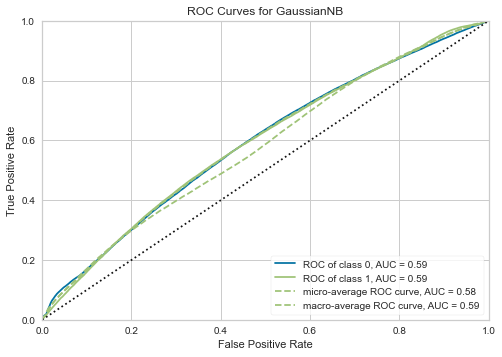

In [32]:
plot_model(model)